In [68]:
import pandas as pd
import numpy as np
import numpy
from matplotlib import pyplot as plt
import tensorflow.keras as keras
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("GNW.CSV")

In [69]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-05-25,18.950001,19.510000,18.75,19.500000,18.250023,39921500
1,2004-05-26,19.500000,19.530001,19.50,19.500000,18.250023,8131800
2,2004-05-27,19.500000,19.510000,19.49,19.500000,18.250023,10778100
3,2004-05-28,19.500000,19.520000,19.50,19.500000,18.250023,5758600
4,2004-06-01,19.500000,19.570000,19.01,19.530001,18.278099,5799900
...,...,...,...,...,...,...,...
3986,2020-03-26,4.080000,4.240000,3.98,4.180000,4.180000,5495300
3987,2020-03-27,4.000000,4.060000,3.73,3.750000,3.750000,8114400
3988,2020-03-30,3.880000,4.110000,3.80,4.050000,4.050000,4368100
3989,2020-03-31,3.970000,4.160000,2.98,3.320000,3.320000,20299900


In [70]:
df['Close']

0       19.500000
1       19.500000
2       19.500000
3       19.500000
4       19.530001
          ...    
3986     4.180000
3987     3.750000
3988     4.050000
3989     3.320000
3990     3.050000
Name: Close, Length: 3991, dtype: float64

In [71]:
df1=df.reset_index()['Close']
df1

0       19.500000
1       19.500000
2       19.500000
3       19.500000
4       19.530001
          ...    
3986     4.180000
3987     3.750000
3988     4.050000
3989     3.320000
3990     3.050000
Name: Close, Length: 3991, dtype: float64

In [72]:
df1.shape

(3991,)

In [73]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

In [74]:
np.array(df1).reshape(-1,1)

array([[19.5       ],
       [19.5       ],
       [19.5       ],
       ...,
       [ 4.05000019],
       [ 3.31999993],
       [ 3.04999995]])

In [75]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.51603982],
       [0.51603982],
       [0.51603982],
       ...,
       [0.08877213],
       [0.06858407],
       [0.06111726]])

In [76]:
df1.shape

(3991, 1)

In [77]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [78]:
train_data.shape

(2594, 1)

In [79]:
type(X_train)

numpy.ndarray

In [80]:
X_train.shape

(2493, 100, 1)

In [81]:
y_train.shape

(2493,)

In [82]:
X_train.shape

(2493, 100, 1)

In [83]:
X_train

array([[[0.51603982],
        [0.51603982],
        [0.51603982],
        ...,
        [0.63467923],
        [0.62638274],
        [0.63993362]],

       [[0.51603982],
        [0.51603982],
        [0.51603982],
        ...,
        [0.62638274],
        [0.63993362],
        [0.63274334]],

       [[0.51603982],
        [0.51603982],
        [0.51686949],
        ...,
        [0.63993362],
        [0.63274334],
        [0.61034292]],

       ...,

       [[0.43556416],
        [0.44358405],
        [0.44413716],
        ...,
        [0.35094026],
        [0.34264379],
        [0.3443031 ]],

       [[0.44358405],
        [0.44413716],
        [0.46598453],
        ...,
        [0.34264379],
        [0.3443031 ],
        [0.33932521]],

       [[0.44413716],
        [0.46598453],
        [0.45741148],
        ...,
        [0.3443031 ],
        [0.33932521],
        [0.34402654]]])

In [84]:
train_data

array([[0.51603982],
       [0.51603982],
       [0.51603982],
       ...,
       [0.34402654],
       [0.33932521],
       [0.34098452]])

In [141]:

model=keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.MeanSquaredError())

In [142]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
39/39 [==============================] - 40s 425ms/step - loss: 0.0934 - val_loss: 0.0861
Epoch 2/10
39/39 [==============================] - 10s 270ms/step - loss: 0.0405 - val_loss: 0.0398
Epoch 3/10
39/39 [==============================] - 10s 262ms/step - loss: 0.0184 - val_loss: 0.0098
Epoch 4/10
39/39 [==============================] - 13s 331ms/step - loss: 0.0059 - val_loss: 4.5805e-04
Epoch 5/10
39/39 [==============================] - 11s 280ms/step - loss: 0.0028 - val_loss: 3.3393e-04
Epoch 6/10
39/39 [==============================] - 12s 296ms/step - loss: 0.0024 - val_loss: 6.1267e-04
Epoch 7/10
39/39 [==============================] - 12s 312ms/step - loss: 0.0023 - val_loss: 6.0141e-04
Epoch 8/10
39/39 [==============================] - 12s 314ms/step - loss: 0.0022 - val_loss: 6.6179e-04
Epoch 9/10
39/39 [==============================] - 8s 210ms/step - loss: 0.0022 - val_loss: 5.5360e-04
Epoch 10/10
39/39 [==============================] - 7s 172ms/step -

In [105]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

41/41 [==============================] - 1s 32ms/step


In [117]:
train_predict

array([[24.22146 ],
       [24.281902],
       [24.33256 ],
       ...,
       [14.579868],
       [14.549716],
       [14.516862]], dtype=float32)

In [107]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

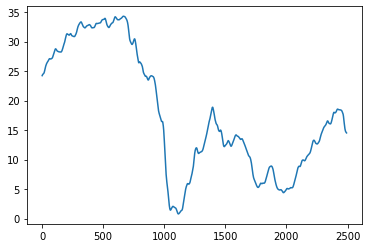

In [119]:
plt.plot(train_predict)

In [134]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [135]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

In [136]:
len(train_predict)

2493

In [137]:
(look_back*2)+1

201

In [138]:
len(df1)-1

3990

In [139]:
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
len(testPredictPlot)

3991

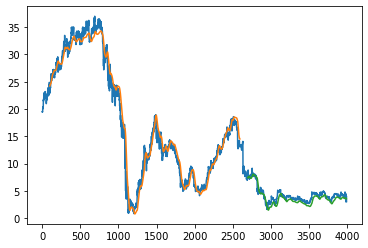

In [140]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
model.layers

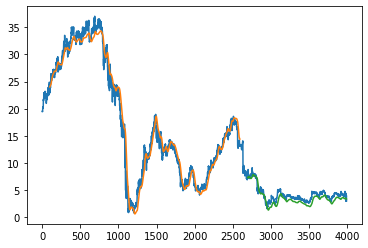

In [23]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

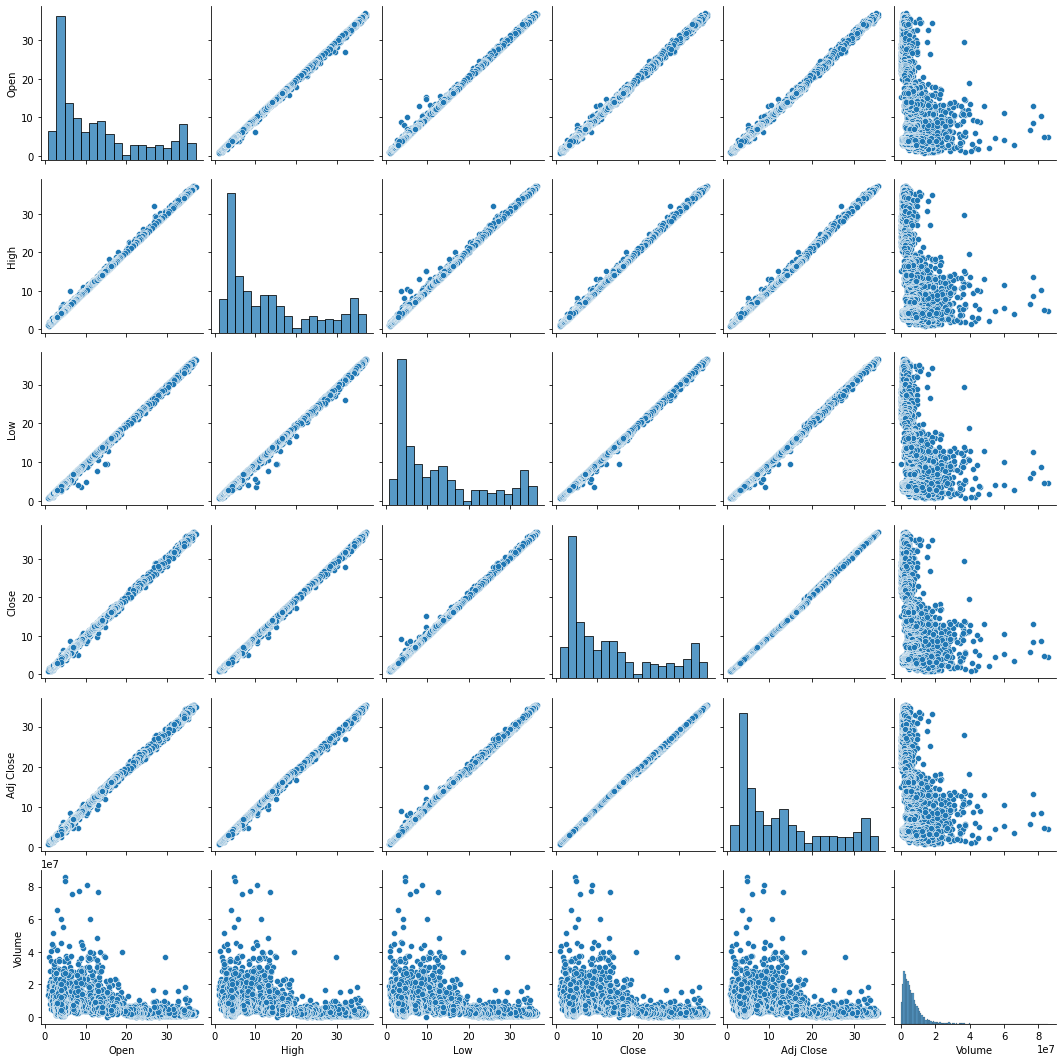

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [7]:
df1

array([[0.51603982],
       [0.51603982],
       [0.51603982],
       ...,
       [0.08877213],
       [0.06858407],
       [0.06111726]])

In [8]:
df1=df.reset_index()['Close']

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
training_size=int(len(df1)*0.65)

In [11]:
testing_size=len(df1)-training_size

In [12]:
trd=df1[0:training_size,:]

In [13]:
ted=df1[training_size:,:]

In [14]:
len(df1)

3991

In [15]:
def makeDS(dset,t_step=1):
    datax,datay=[],[]
    for i in range (len(dset)-t_step-1):
        datax.append(dset[i:(i+t_step),0])
        datay.append(dset[i+t_step,0])
    return np.array(datax),np.array(datay)


In [16]:
time_step=100
xtr,ytr=makeDS(trd,time_step)
xte,yte=makeDS(ted,time_step)

In [17]:
xtr.shape

(2493, 100)

In [18]:
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],1)
xte=xte.reshape(xte.shape[0],xte.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(xtr,ytr,validation_data=(xte,yte),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 13s 217ms/step - loss: 0.0363 - val_loss: 4.6592e-04
Epoch 2/100
39/39 [==============================] - 8s 200ms/step - loss: 0.0013 - val_loss: 1.5785e-04
Epoch 3/100
39/39 [==============================] - 8s 195ms/step - loss: 0.0011 - val_loss: 1.2918e-04
Epoch 4/100
39/39 [==============================] - 8s 208ms/step - loss: 0.0010 - val_loss: 1.6870e-04
Epoch 5/100
39/39 [==============================] - 10s 260ms/step - loss: 9.9288e-04 - val_loss: 1.5244e-04
Epoch 6/100
39/39 [==============================] - 10s 265ms/step - loss: 9.5707e-04 - val_loss: 2.6207e-04
Epoch 7/100
39/39 [==============================] - 9s 234ms/step - loss: 9.4340e-04 - val_loss: 1.9250e-04
Epoch 8/100
39/39 [==============================] - 10s 261ms/step - loss: 8.9724e-04 - val_loss: 1.5134e-04
Epoch 9/100
39/39 [==============================] - 9s 220ms/step - loss: 8.5713e-04 - val_loss: 1.5523e-04
Epoch 10/100
39/39 [===========

In [67]:
train_predict=model.predict(xtr)
test_predict=model.predict(xte)

NameError: name 'xtr' is not defined

In [ ]:
test_predict.shape

In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [60]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

In [55]:
from matplotlib import pyplot as plt

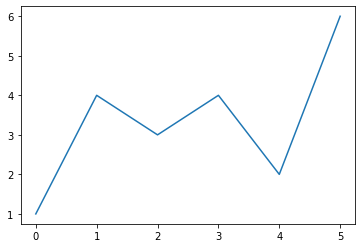

In [65]:
plt.plot(np.array([1,4,3,4,2,6]))

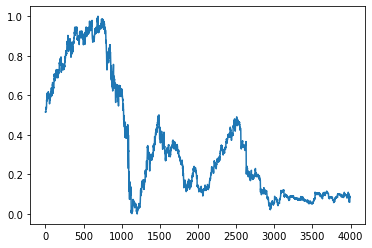

In [57]:
plt.plot(df1)

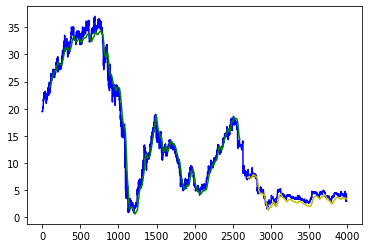

In [58]:

plt.plot(scaler.inverse_transform(df1),c='b')
plt.plot(testPredictPlot,c='y')
plt.plot(trainPredictPlot,c='g')
plt.show()

In [29]:
scaler.inverse_transform(df)

array([[2.64592130e+07, 6.86072028e+02, 7.06321609e+02, ...,
        7.05960000e+02, 6.60760828e+02, 1.44356144e+09],
       [2.64592492e+07, 7.05960000e+02, 7.07044825e+02, ...,
        7.05960000e+02, 6.60760828e+02, 2.94045889e+08],
       [2.64592853e+07, 7.05960000e+02, 7.06321609e+02, ...,
        7.05960000e+02, 6.60760828e+02, 3.89736097e+08],
       ...,
       [2.66685071e+07, 1.41140804e+02, 1.49457605e+02, ...,
        1.47288007e+02, 1.47288007e+02, 1.57950497e+08],
       [2.66685433e+07, 1.44395201e+02, 1.51265595e+02, ...,
        1.20891198e+02, 1.20891198e+02, 7.34044385e+08],
       [2.66685794e+07, 1.05704003e+02, 1.18360000e+02, ...,
        1.11127998e+02, 1.11127998e+02, 3.16580801e+08]])

In [26]:
x=[1,2,3]
y=[4,5,6]

In [27]:
a=[]
b=[]
for i in range(10):
    print(i)
    for j in x:
        a.append(j)
    b.append(a)
    a=[]
x=b

0
1
2
3
4
5
6
7
8
9


In [30]:
import numpy as np
x=np.array(x)
len(x.shape)
a=1
for i in range(len(x.shape)):
    a*=x.shape[i]
x=x.reshape(a)

2

In [31]:
a=1
for i in range(len(x.shape)):
    a*=x.shape[i]
a

30

In [33]:
x=x.reshape(a)

In [34]:
x

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3, 1, 2, 3])